### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [124]:
data = pd.read_csv('../data/coupons.csv')

In [125]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [126]:
# check missing values 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [128]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [129]:
# Drop car column
# first there is very mimimal data available only about 1%,
# second categories also do not make much sense or useful for our analysis
data = data.drop(columns='car')

In [130]:
#Replacing the missing values with mode of the column
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

In [131]:
#Check missing values after replacing them with mode of the column
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [132]:
# age is type object, which could create problems, best to convert it to int64
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [133]:
# Replace '50plus' with a suitable numeric representation (e.g., 55)
data['age'] = np.where(data['age'] == '50plus', 55, data['age'])

# Convert 'below21' to 18 which is a common legal age and then convert all other ages to integers
data['age'] = np.where(data['age'] == 'below21', 18, data['age']).astype(int)

print(data["age"].dtype)
data["age"].value_counts()


int64


age
21    2653
26    2559
31    2039
55    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

In [134]:
# Define the mapping dictionary
income_mapping = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

# Map the income categories to numeric values
data['income'] = data['income'].map(income_mapping)

# Display unique values in the 'income' column to verify the mapping
print(data['income'].unique())
print(data['income'].dtype)

[3 5 1 6 4 2 8 7 0]
int64


4. What proportion of the total observations chose to accept the coupon? 



In [135]:
#The proportion/percentage of the total observations chose to accept the coupon is 56.84
(data[data['Y'] == 1].shape[0] / data['Y'].shape[0]) * 100

56.84326710816777

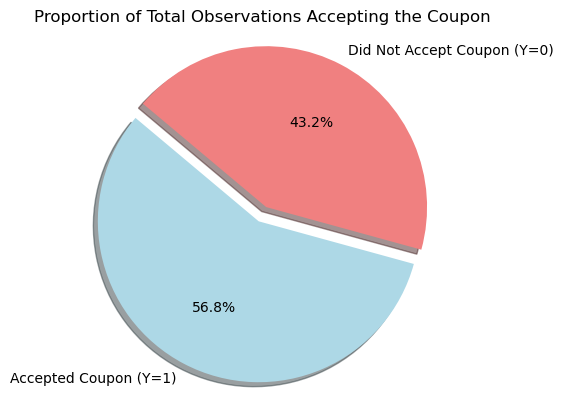

In [136]:
# Calculate how many accepted the coupon and how many didn't
proportion_accepted = data[data['Y'] == 1].shape[0] 
proportion_not_accepted = data[data['Y'] == 0].shape[0] 

# Pie chart
labels = ['Accepted Coupon (Y=1)', 'Did Not Accept Coupon (Y=0)']
sizes = [proportion_accepted, proportion_not_accepted]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Coupon')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [137]:
coupon_counts = data['coupon'].value_counts()

# Create a Plotly bar plot
fig = px.bar(x=coupon_counts.index, y=coupon_counts.values, labels={'x':'Coupon Type', 'y':'Count'},
             title='Distribution of Coupons')
fig.show()

6. Use a histogram to visualize the temperature column.

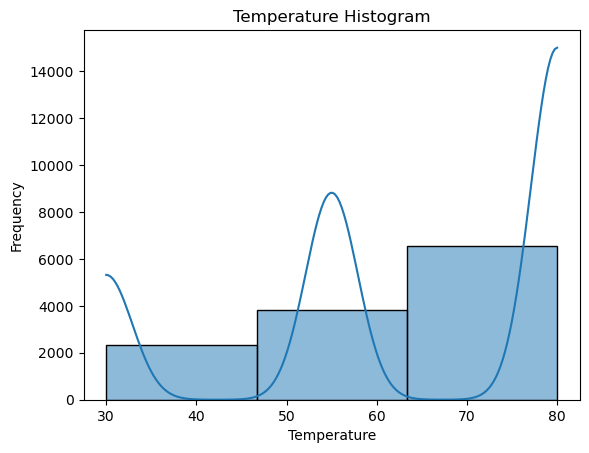

In [138]:
# Create a sns histogram plot
sns.histplot(data['temperature'], bins=3, kde=True)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [139]:
data["coupon"].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [140]:
bar_coupon_data = data[data["coupon"]=="Bar"]
bar_coupon_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [141]:
bar_coupon_data["coupon"].value_counts()

coupon
Bar    2017
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [142]:
bar_coupon_data["Y"].value_counts()

Y
0    1190
1     827
Name: count, dtype: int64

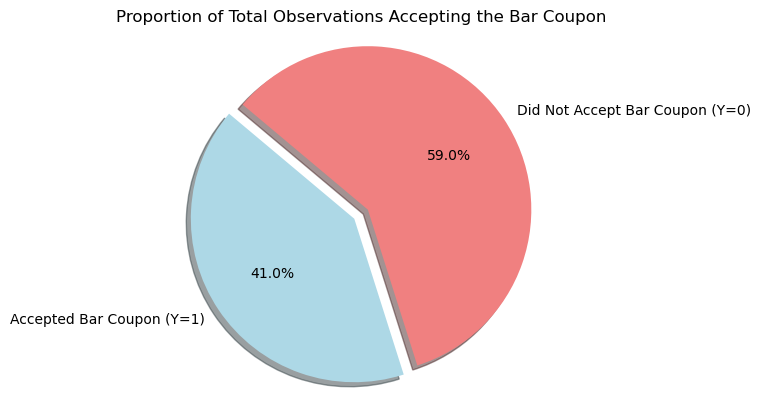

In [143]:
#The proportion/percentage of bar coupons accepted is 41
proportion_accepted_bar = (bar_coupon_data[bar_coupon_data['Y'] == 1].shape[0] / bar_coupon_data['Y'].shape[0]) * 100
proportion_not_accepted_bar = (bar_coupon_data[bar_coupon_data['Y'] == 0].shape[0] / bar_coupon_data['Y'].shape[0]) * 100

# Pie chart
labels = ['Accepted Bar Coupon (Y=1)', 'Did Not Accept Bar Coupon (Y=0)']
sizes = [proportion_accepted_bar, proportion_not_accepted_bar]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Bar Coupon')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [144]:
# Check the data and value counts
bar_coupon_data.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [145]:
# Subset for users who went to a bar 3 or fewer times a month
bar_subset1 = bar_coupon_data[bar_coupon_data['Bar'].isin(['never', 'less1', '1~3'])]

# Subset for users who went to a bar more than 3 times a month
bar_subset2 = bar_coupon_data[bar_coupon_data['Bar'].isin(['4~8', 'gt8'])]

In [146]:
# Calculate acceptance rates
bar_acceptance_rate_subset1 = (bar_subset1[bar_subset1['Y'] == 1].shape[0] / bar_subset1['Y'].shape[0]) * 100
bar_acceptance_rate_subset2 = (bar_subset2[bar_subset2['Y'] == 1].shape[0] / bar_subset2['Y'].shape[0]) * 100

print("Acceptance Rate for Users with 3 or Fewer Bar Visits:", bar_acceptance_rate_subset1)
print("Acceptance Rate for Users with More Than 3 Bar Visits:", bar_acceptance_rate_subset2)

Acceptance Rate for Users with 3 or Fewer Bar Visits: 37.073707370737075
Acceptance Rate for Users with More Than 3 Bar Visits: 76.88442211055276


[Text(0.5, 1.0, 'more_than_3_visits')]

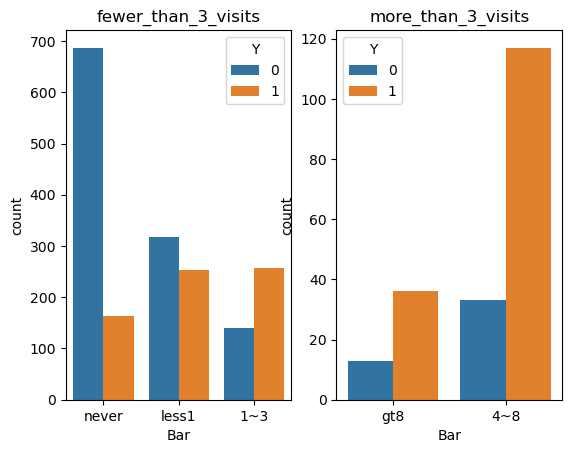

In [147]:
fig, ax = plt.subplots(1,2)
sns.countplot(data=bar_subset1, x="Bar", hue="Y", ax=ax[0]).set(title='fewer_than_3_visits')
sns.countplot(data=bar_subset2, x="Bar", hue="Y", ax=ax[1]).set(title='more_than_3_visits')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [148]:
bar_coupon_data.Bar.unique(), bar_coupon_data.age.unique()

(array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object),
 array([21, 46, 26, 31, 41, 55, 36, 18]))

In [149]:
# Subset 3: Drivers who go to a bar more than once a month and are over the age of 25
bar_subset3 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age > 25')
bar_subset3["age"].value_counts(), bar_subset3["Bar"].value_counts()

(age
 26    169
 31     96
 55     67
 36     40
 41     32
 46     16
 Name: count, dtype: int64,
 Bar
 1~3    284
 4~8    106
 gt8     30
 Name: count, dtype: int64)

In [150]:
# Subset 4: All other drivers
bar_subset4 = bar_coupon_data.query('(Bar == "never" or Bar == "less1") and age <= 25')
bar_subset4["age"].value_counts(), bar_subset4["Bar"].value_counts()

(age
 21    251
 18     77
 Name: count, dtype: int64,
 Bar
 never    208
 less1    120
 Name: count, dtype: int64)

In [151]:
# Calculate acceptance rates for each subset
bar_acceptance_rate_subset3 = bar_subset3[bar_subset3["Y"] == 1].shape[0] / bar_subset3["Y"].shape[0] *100
bar_acceptance_rate_subset4 = bar_subset4[bar_subset4["Y"] == 1].shape[0] / bar_subset4["Y"].shape[0] *100

# Print acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:", bar_acceptance_rate_subset3)
print("Acceptance rate for all other drivers:", bar_acceptance_rate_subset4)

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52380952380952
Acceptance rate for all other drivers: 39.329268292682926


In [152]:
# Check if there is a difference
if bar_acceptance_rate_subset3 > bar_acceptance_rate_subset4:
    print("There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.")
elif bar_acceptance_rate_subset3 < bar_acceptance_rate_subset4:
    print("There is a higher acceptance rate for all other drivers.")
else:
    print("The acceptance rates are the same for both groups.")

There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.


[Text(0.5, 1.0, 'all_others')]

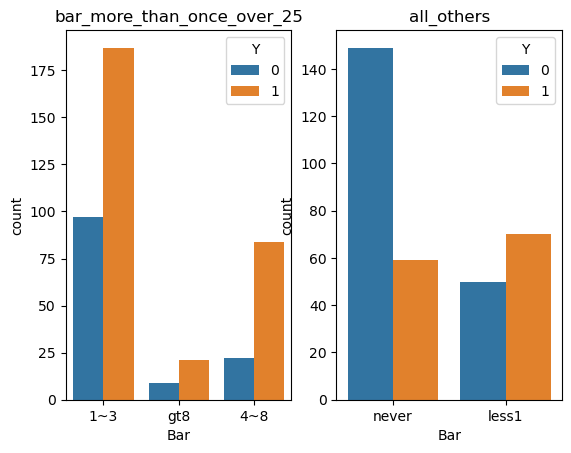

In [153]:
fig, ax = plt.subplots(1,2)
sns.countplot(data=bar_subset3, x="Bar", hue="Y", ax=ax[0]).set(title='bar_more_than_once_over_25')
sns.countplot(data=bar_subset4, x="Bar", hue="Y", ax=ax[1]).set(title='all_others')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [154]:
bar_coupon_data["has_children"].value_counts(), bar_coupon_data["occupation"].value_counts()

(has_children
 0    1142
 1     875
 Name: count, dtype: int64,
 occupation
 Unemployed                                   301
 Student                                      251
 Computer & Mathematical                      232
 Sales & Related                              178
 Education&Training&Library                   140
 Management                                   119
 Office & Administrative Support              105
 Arts Design Entertainment Sports & Media     100
 Business & Financial                          89
 Retired                                       75
 Food Preparation & Serving Related            48
 Community & Social Services                   44
 Healthcare Support                            44
 Healthcare Practitioners & Technical          41
 Transportation & Material Moving              35
 Legal                                         34
 Architecture & Engineering                    27
 Personal Care & Service                       27
 Protective Service     

(Bar
 1~3    256
 4~8    116
 gt8     44
 Name: count, dtype: int64,
 has_children
 0    416
 Name: count, dtype: int64,
 occupation
 Unemployed                                  66
 Student                                     64
 Sales & Related                             55
 Management                                  30
 Office & Administrative Support             30
 Computer & Mathematical                     23
 Business & Financial                        22
 Arts Design Entertainment Sports & Media    21
 Education&Training&Library                  19
 Legal                                       17
 Food Preparation & Serving Related          12
 Healthcare Support                          11
 Protective Service                           9
 Construction & Extraction                    7
 Community & Social Services                  6
 Production Occupations                       6
 Architecture & Engineering                   6
 Transportation & Material Moving             6
 He

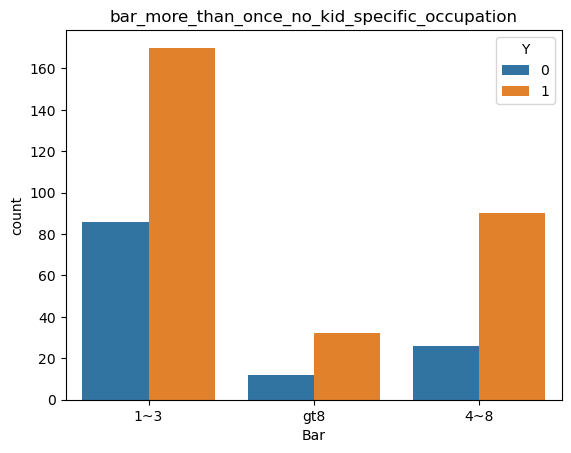

In [155]:
# subset 5: drivers who go to bars more than once a month and had passengers that were not a kid 
# and had occupations other than farming, fishing, or forestry.

bar_subset5 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and has_children == 0 and occupation != "Farming Fishing & Forestry"')
sns.countplot(data=bar_subset5, x="Bar", hue="Y").set(title='bar_more_than_once_no_kid_specific_occupation')
bar_subset5["Bar"].value_counts(), bar_subset5["has_children"].value_counts(), bar_subset5["occupation"].value_counts()

In [156]:
# Calculate acceptance rate
bar_acceptance_rate_subset5 = bar_subset5[bar_subset5["Y"] == 1].shape[0] / bar_subset5["Y"].shape[0] *100
bar_acceptance_rate_subset5

70.1923076923077

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [157]:
bar_coupon_data['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [158]:
# subset6 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_subset6 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and has_children == 0 and maritalStatus != "Widowed"')
bar_subset6["Bar"].value_counts(), bar_subset6["has_children"].value_counts(), bar_subset6["maritalStatus"].value_counts()

(Bar
 1~3    256
 4~8    116
 gt8     44
 Name: count, dtype: int64,
 has_children
 0    416
 Name: count, dtype: int64,
 maritalStatus
 Single               255
 Unmarried partner     96
 Married partner       65
 Name: count, dtype: int64)

In [159]:
# Calculate acceptance rate
bar_acceptance_rate_subset6 = bar_subset6[bar_subset6["Y"] == 1].shape[0] / bar_subset6["Y"].shape[0] *100
bar_acceptance_rate_subset6

70.1923076923077

In [160]:
# subset7 - go to bars more than once a month and are under the age of 30
bar_subset7 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age < 30')
bar_subset7["Bar"].value_counts(), bar_subset7["age"].value_counts()

(Bar
 1~3    209
 4~8     99
 gt8     37
 Name: count, dtype: int64,
 age
 26    169
 21    166
 18     10
 Name: count, dtype: int64)

In [161]:
# Calculate acceptance rate
bar_acceptance_rate_subset7 = bar_subset7[bar_subset7["Y"] == 1].shape[0] / bar_subset7["Y"].shape[0] *100
bar_acceptance_rate_subset7

72.17391304347827

In [162]:
bar_coupon_data["RestaurantLessThan20"].value_counts(), bar_coupon_data["income"].value_counts()

(RestaurantLessThan20
 1~3      901
 4~8      568
 less1    325
 gt8      186
 never     37
 Name: count, dtype: int64,
 income
 2    318
 8    291
 1    288
 3    267
 4    262
 0    165
 6    151
 7    145
 5    130
 Name: count, dtype: int64)

In [163]:
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K.
bar_subset8 = bar_coupon_data.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and income < 4')

In [164]:
bar_subset8["RestaurantLessThan20"].value_counts(), bar_subset8["income"].value_counts()

(RestaurantLessThan20
 4~8    248
 gt8     96
 Name: count, dtype: int64,
 income
 1    99
 3    98
 2    74
 0    73
 Name: count, dtype: int64)

In [165]:
# Calculate acceptance rate
bar_acceptance_rate_subset8 = bar_subset8[bar_subset8["Y"] == 1].shape[0] / bar_subset8["Y"].shape[0] *100
bar_acceptance_rate_subset8

45.348837209302324

In [166]:
bar_acceptance_rates = [bar_acceptance_rate_subset1, bar_acceptance_rate_subset2, bar_acceptance_rate_subset3, bar_acceptance_rate_subset4, bar_acceptance_rate_subset5, bar_acceptance_rate_subset6, bar_acceptance_rate_subset7, bar_acceptance_rate_subset8]
bar_subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5', 'Subset 6', 'Subset 7', 'Subset 8']
bar_acceptance_rates

[37.073707370737075,
 76.88442211055276,
 69.52380952380952,
 39.329268292682926,
 70.1923076923077,
 70.1923076923077,
 72.17391304347827,
 45.348837209302324]

In [167]:
# create a DataFrame 
bar_acceptance_rates_df = pd.DataFrame({'Bar Subset': bar_subset_labels, 'Bar Acceptance Rates': bar_acceptance_rates})
bar_acceptance_rates_df

,Bar Subset,Bar Acceptance Rates
0,Subset 1,37.073707
1,Subset 2,76.884422
2,Subset 3,69.523810
3,Subset 4,39.329268
4,Subset 5,70.192308
5,Subset 6,70.192308
6,Subset 7,72.173913
7,Subset 8,45.348837


In [168]:
# Create a bar plot
px.bar(bar_acceptance_rates_df.sort_values('Bar Acceptance Rates', ascending=False), x = "Bar Subset" , y = "Bar Acceptance Rates",
       title='Acceptance Rates for Different Bar Subsets')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [169]:
# Bar Subsets:
# Subset 1 - users who went to a bar 3 or fewer times a month
# Subset 2 - users who went to a bar more than 3 times a month
# Subset 3 - Drivers who go to a bar more than once a month and are over the age of 25
# Subset 4 - All other drivers
# subset 5 - drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
# subset 6 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# subset 7 - go to bars more than once a month and are under the age of 30
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K

In [170]:
# Conclusion Bar Coupons:
# - Acceptance rates are higher for people between the age 25 to 30
# - who go to the bar more than once a month,its highest for those who go to the bar more than 3 times 
# - who had passengers that were not a kid and 
# - had occupations other than farming, fishing, or forestry and 
# - were not widowed
# - Accpetance rates are lower for those who go to cheap restaurants more than 4 times and income is less than 50K

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [171]:
# EDA (Exploratory Data Analysis) for CoffeeHouse Coupons

In [172]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [173]:
coffee_coupon_data = data.query('coupon == "Coffee House"')
coffee_coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [174]:
coffee_coupon_data.CoffeeHouse.unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

In [175]:
coffee_coupon_data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1147
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

In [176]:
coffee_coupon_data.groupby("CoffeeHouse")["age"].median()

CoffeeHouse
1~3      26.0
4~8      31.0
gt8      26.0
less1    31.0
never    31.0
Name: age, dtype: float64

In [177]:
px.histogram(coffee_coupon_data, x = 'CoffeeHouse', color='age')

In [178]:
px.histogram(coffee_coupon_data, x = 'CoffeeHouse', color='occupation')

<Axes: xlabel='occupation', ylabel='CoffeeHouse'>

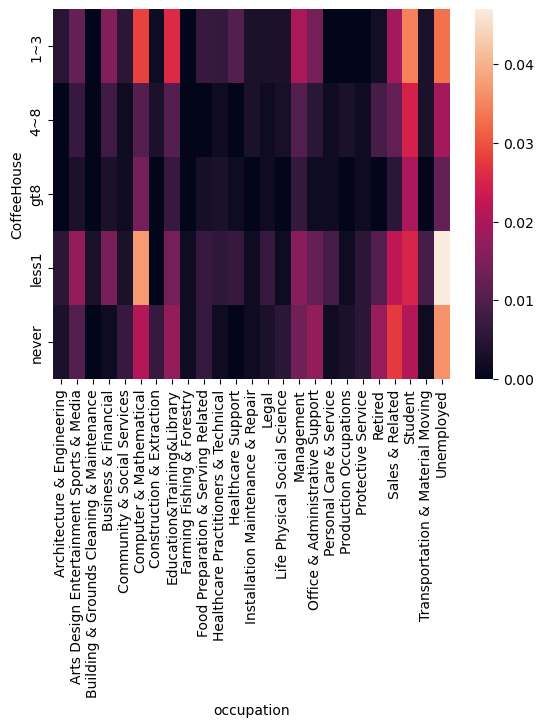

In [179]:
sns.heatmap(pd.crosstab(data.CoffeeHouse, data.occupation, normalize=True), annot=False)

In [180]:
# Top Occupations to explore for 1~3 times: Unemployed, Student, Computer & Mathematical, Education&Training$Library

In [181]:
# CoffeeHouse Subsets:
# Subset 1 - users who went to a CoffeeHouse 3 or fewer times a month
# Subset 2 - users who went to a CoffeeHouse more than 3 times a month
# Subset 3 - Drivers who go to a CoffeeHouse more than once a month and are over the age of 25
# Subset 4 - All other drivers (~subset3)
# subset 5 - drivers who go to CoffeeHouse more than once a month and had no kids and occupation (Unemployed, Student, Computer & Mathematical, Education&Training$Library)
# subset 6 - go to CoffeeHouse more than once a month, had no kids, and were not widowed 
# subset 7 - go to CoffeeHouse more than once a month and are under the age of 30
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K

In [182]:
# Subset 1 - users who went to a CoffeeHouse 3 or fewer times a month
coffee_subset1 = coffee_coupon_data.query('CoffeeHouse == "never" or CoffeeHouse == "less1" or CoffeeHouse == "1~3"')
coffee_acceptance_rate_subset1 = coffee_subset1[coffee_subset1["Y"] == 1].shape[0] / coffee_subset1["Y"].shape[0] *100
coffee_acceptance_rate_subset1

44.9614890885751

In [183]:
# Subset 2 - users who went to a CoffeeHouse more than 3 times a month
coffee_subset2 = coffee_coupon_data.query('CoffeeHouse == "4~8" or CoffeeHouse == "gt8"')
coffee_acceptance_rate_subset2 = coffee_subset2[coffee_subset2["Y"] == 1].shape[0] / coffee_subset2["Y"].shape[0] *100
coffee_acceptance_rate_subset2

67.5

In [184]:
# Subset 3 - Drivers who go to a CoffeeHouse more than once a month and are over the age of 25
coffee_subset3 = coffee_coupon_data.query('(CoffeeHouse == "1~3" or CoffeeHouse == "4~8" or CoffeeHouse == "gt8") and age > 25')
coffee_acceptance_rate_subset3 = coffee_subset3[coffee_subset3["Y"] == 1].shape[0] / coffee_subset3["Y"].shape[0] *100
coffee_acceptance_rate_subset3

63.84388807069219

In [185]:
# Subset 4 - All other drivers (~Coffee subset3)
coffee_subset4 = coffee_coupon_data.query('(CoffeeHouse == "never" or CoffeeHouse == "less1") and age <= 25')
coffee_acceptance_rate_subset4 = coffee_subset4[coffee_subset4["Y"] == 1].shape[0] / coffee_subset4["Y"].shape[0] *100
coffee_acceptance_rate_subset4

35.654008438818565

In [186]:
# subset 5 - drivers who go to CoffeeHouse more than once a month and had no kids and occupation (Unemployed, Student, Computer & Mathematical, Education&Training$Library)
coffee_subset5 = coffee_coupon_data.query('(CoffeeHouse == "1~3" or CoffeeHouse == "4~8" or CoffeeHouse == "gt8") and has_children == 0 and (occupation == "Unemployed" or occupation == "Computer & Mathematical" or occupation == "Student" or occupation == "Education&Training&Library")')
coffee_acceptance_rate_subset5 = coffee_subset5[coffee_subset5["Y"] == 1].shape[0] / coffee_subset5["Y"].shape[0] *100
coffee_acceptance_rate_subset5

69.6763202725724

In [187]:
# subset 6 - go to CoffeeHouse more than once a month, had passengers that were not a kid, and were not widowed 
coffee_subset6 = coffee_coupon_data.query('(CoffeeHouse == "1~3" or CoffeeHouse == "4~8" or CoffeeHouse == "gt8") and has_children == 0 and maritalStatus != "Widowed"')
coffee_acceptance_rate_subset6 = coffee_subset6[coffee_subset6["Y"] == 1].shape[0] / coffee_subset6["Y"].shape[0] *100
coffee_acceptance_rate_subset6

67.12446351931331

In [188]:
# subset 7 - go to CoffeeHouse more than once a month and are under the age of 30
coffee_subset7 = coffee_coupon_data.query('(CoffeeHouse == "1~3" or CoffeeHouse == "4~8" or CoffeeHouse == "gt8") and age < 30')
coffee_acceptance_rate_subset7 = coffee_subset7[coffee_subset7["Y"] == 1].shape[0] / coffee_subset7["Y"].shape[0] *100
coffee_acceptance_rate_subset7

68.93401015228426

In [189]:
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K
coffee_subset8 = coffee_coupon_data.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and income < 4')
coffee_acceptance_rate_subset8 = coffee_subset8[coffee_subset8["Y"] == 1].shape[0] / coffee_subset8["Y"].shape[0] *100
coffee_acceptance_rate_subset8

54.29740791268759

In [190]:
coffee_acceptance_rates = [coffee_acceptance_rate_subset1, coffee_acceptance_rate_subset2, coffee_acceptance_rate_subset3, coffee_acceptance_rate_subset4, coffee_acceptance_rate_subset5, coffee_acceptance_rate_subset6, coffee_acceptance_rate_subset7, coffee_acceptance_rate_subset8]
coffee_subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5', 'Subset 6', 'Subset 7', 'Subset 8']
coffee_acceptance_rates

[44.9614890885751,
 67.5,
 63.84388807069219,
 35.654008438818565,
 69.6763202725724,
 67.12446351931331,
 68.93401015228426,
 54.29740791268759]

Text(0.5, 1.0, 'fewer_than_3_visits')

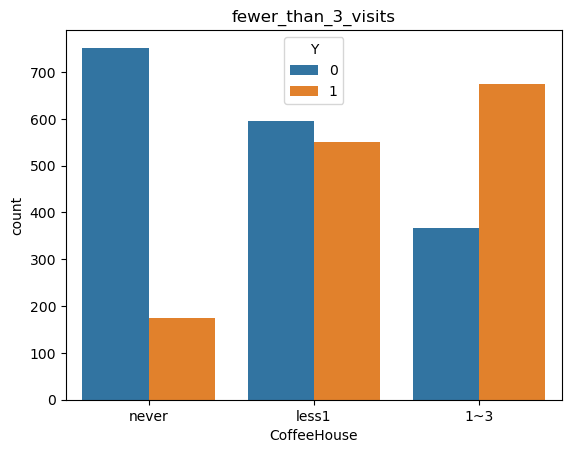

In [191]:
sns.countplot(data=coffee_subset1, x="CoffeeHouse", hue="Y")
plt.title('fewer_than_3_visits')

Text(0.5, 1.0, 'more_than_3_visits')

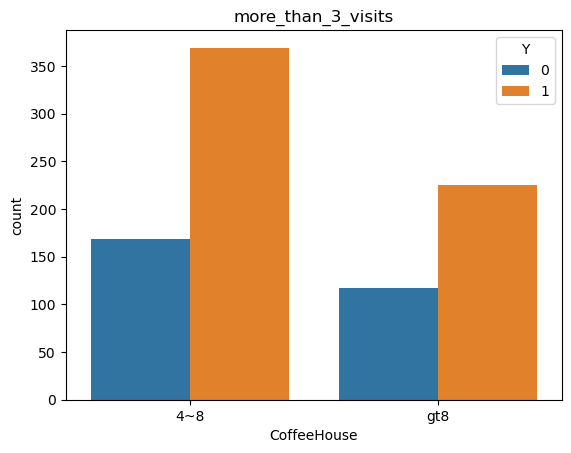

In [192]:
sns.countplot(data=coffee_subset2, x="CoffeeHouse", hue="Y")
plt.title('more_than_3_visits')

Text(0.5, 1.0, 'more_than_once_over_25')

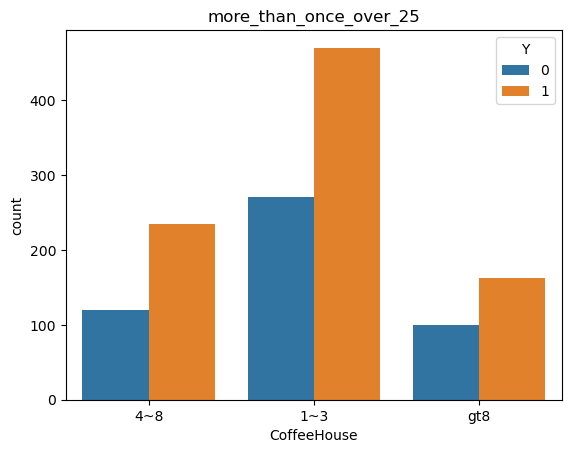

In [193]:
sns.countplot(data=coffee_subset3, x="CoffeeHouse", hue="Y")
plt.title('more_than_once_over_25')

Text(0.5, 1.0, 'less_than_once_less_than_25')

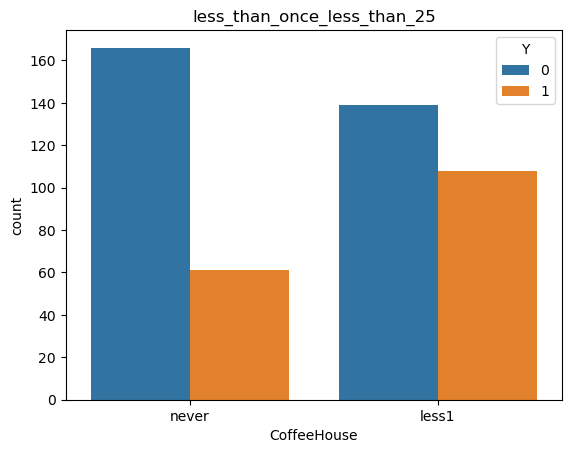

In [194]:
sns.countplot(data=coffee_subset4, x="CoffeeHouse", hue="Y")
plt.title('less_than_once_less_than_25')

Text(0.5, 1.0, 'more_than_once_no_kids_no_farming_fishing_forestry')

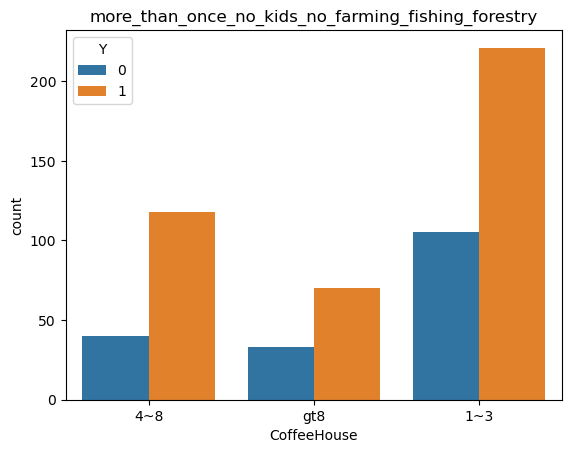

In [195]:
sns.countplot(data=coffee_subset5, x="CoffeeHouse", hue="Y")
plt.title('more_than_once_no_kids_no_farming_fishing_forestry')

Text(0.5, 1.0, 'more_than_once_no_kids_not_widowed')

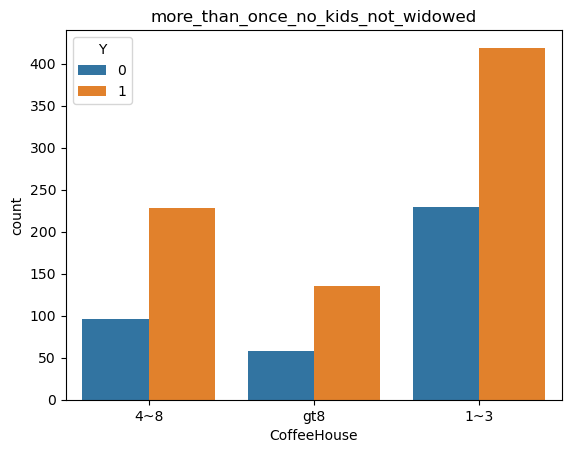

In [196]:
sns.countplot(data=coffee_subset6, x="CoffeeHouse", hue="Y")
plt.title('more_than_once_no_kids_not_widowed')

Text(0.5, 1.0, 'more_than_once_under_30')

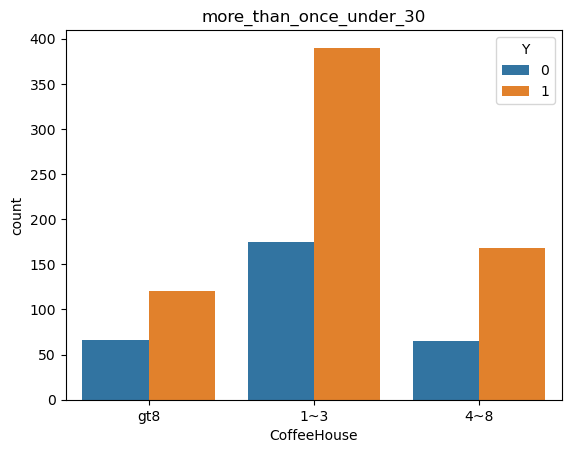

In [197]:
sns.countplot(data=coffee_subset7, x="CoffeeHouse", hue="Y")
plt.title('more_than_once_under_30')

Text(0.5, 1.0, 'cheap_restaurants_more_than_4_income_less_tahn_50K')

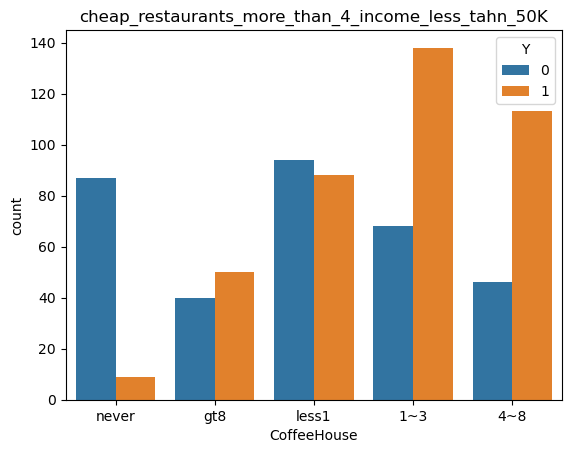

In [198]:
sns.countplot(data=coffee_subset8, x="CoffeeHouse", hue="Y")
plt.title('cheap_restaurants_more_than_4_income_less_tahn_50K')

In [199]:
# create a df for acceptance rates for all subsets (Key: Subset1, Subset2, etc.)
coffee_acceptance_rates_df = pd.DataFrame({'Subset': coffee_subset_labels, 'Acceptance Rate': coffee_acceptance_rates})
coffee_acceptance_rates_df

,Subset,Acceptance Rate
0,Subset 1,44.961489
1,Subset 2,67.500000
2,Subset 3,63.843888
3,Subset 4,35.654008
4,Subset 5,69.676320
5,Subset 6,67.124464
6,Subset 7,68.934010
7,Subset 8,54.297408


In [200]:
px.bar(coffee_acceptance_rates_df.sort_values('Acceptance Rate', ascending=False), x = 'Subset', y = 'Acceptance Rate')

In [201]:
# CoffeeHouse Subsets:
# Subset 1 - users who went to a CoffeeHouse 3 or fewer times a month
# Subset 2 - users who went to a CoffeeHouse more than 3 times a month
# Subset 3 - Drivers who go to a CoffeeHouse more than once a month and are over the age of 25
# Subset 4 - All other drivers (~subset3)
# subset 5 - drivers who go to CoffeeHouse more than once a month and had no kids and occupation (Unemployed, Student, Computer & Mathematical, Education&Training$Library)
# subset 6 - go to CoffeeHouse more than once a month, had no kids, and were not widowed 
# subset 7 - go to CoffeeHouse more than once a month and are under the age of 30
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K

In [202]:
# Conclusion CoffeeHouse:
# Acceptance rates are higher for people between 25 - 30 
# who go to coffeehouse more than once or even higher for 1~3 times
# has no kids and were not widowed
# occupation is either unemployed or Student or Computer & Mathematical or Education&Training$Library